# Quick linear fit example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Regre_slope.csv', index_col='TIME')
#print(df.head())
for col in df.columns[:-1]:
    print(col) 

csd_r_a
css_r_a
eng_r_a
fin_r_a
hea_r_a
ind_r_a
mat_r_a
tec_r_a
tel_r_a
utl_r_a


In [3]:
x = np.arange(0.1, 1.3, 0.1)
y = df[str(col)].values

In [4]:
# x = np.arange(0, 240)
# np.random.seed(42)
# y = 3 * x + np.random.random(240)
# plt.plot(x[:12], y[:12], "o-")
# plt.show()

## Loop fit

In [5]:
i = 0
slopes = []
while i < len(y) - 12:
    x_temp = x
    y_temp = y[i:i+12]
    fit = np.polyfit(x_temp, y_temp, 1)
    slope_temp = fit[0]
    slopes.append(slope_temp)
    i += 1
##format converting
slopes = np.array(slopes)

In [6]:
#print(slopes)
print(len(slopes))

269


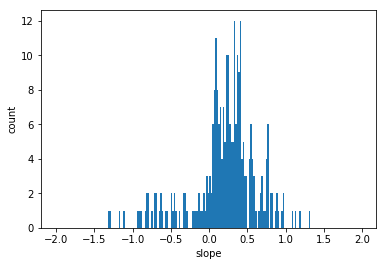

In [7]:
plt.clf()
plt.hist(slopes, bins=np.arange(-2, 2, 0.02))
plt.xlabel("slope")
plt.ylabel("count")
#plt.legend()
plt.show()

## One pipleline code

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data/Regre_slope.csv', index_col='TIME')
#print(df.head())

df_slope = pd.DataFrame()

for col in df.columns[:-1]:
    x = np.arange(0.1, 1.3, 0.1)
    y = df[str(col)].values
    
    slopes = []
    i = 12
    while i <= len(y):
        x_temp = x
        y_temp = y[i-12:i]
        fit =  np.polyfit(x_temp, y_temp, 1)
        slope_temp = fit[0]
    #     print("i", i, "slopes", slopes, "slope_temp", slope_temp)
    #     print("slopes", type(slopes))
        slopes.append(slope_temp)
        i += 1
        # endwhile
    #formating converting
    slopes = np.array(slopes)
    df_slope[str(col)] = slopes 
    
    # endfor
    
print(df_slope.head())



    csd_r_a   css_r_a   eng_r_a   fin_r_a   hea_r_a   ind_r_a   mat_r_a  \
0  0.155759  0.330748  0.184280  0.451657  0.466990  0.290563  0.193397   
1  0.142965  0.341119  0.178713  0.465651  0.527273  0.291605  0.166832   
2  0.140797  0.346021  0.174920  0.478766  0.542164  0.297115  0.147827   
3  0.160524  0.332129  0.201150  0.463985  0.531976  0.306731  0.168336   
4  0.171332  0.307126  0.236566  0.419612  0.486741  0.315832  0.178559   

    tec_r_a   tel_r_a   utl_r_a  
0  0.447472  0.368564  0.225870  
1  0.343374  0.408357  0.255431  
2  0.275385  0.401036  0.251754  
3  0.170147  0.358883  0.218927  
4  0.149290  0.321575  0.174318  
